In [98]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [99]:
df = pd.read_csv('Path to csv file')

In [100]:
question_description = 'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'
region_description = 'US Region'

df[region_description] = df[region_description].str.strip().replace('-', np.nan)
df[question_description] = df[question_description].str.strip().replace('-', np.nan)
df.dropna(subset=[region_description,question_description], inplace=True)

In [144]:
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib import transforms


def graph():
    #graph1
    chart_to_100 = df.groupby(region_description)[question_description].value_counts(normalize=True).unstack().fillna(0) * 100

    fig = plt.figure(figsize=(22, 10))
    gs = fig.add_gridspec(2, 2, height_ratios=[2, 2.5])
    ax1 = fig.add_subplot(gs[0, 0])
    colors = plt.cm.Pastel2(np.linspace(0, 1, len(chart_to_100.columns)))
    
    bars = chart_to_100.plot(kind='barh', stacked=True, color=colors, edgecolor='white', ax=ax1)

    for i, reg in enumerate(chart_to_100.index):
        x_position = 0
        for question, color in zip(chart_to_100.columns, colors):
            width = chart_to_100.loc[reg, question]
            ax1.text(x_position + (width / 4), i, f'{width:.1f}%', ha='left', va='center', fontsize=10, color='black')
            x_position += width
    ax1.set_xlim(0, 100)
    ax1.set_title('Graph 1')
    
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(chart_to_100.columns))

    #graph2
    ax2 = fig.add_subplot(gs[0, 1])
    absolute_chart = df.groupby([region_description, question_description]).size().unstack()
    left = np.zeros(len(absolute_chart))
    colors = plt.cm.tab20c(np.linspace(0, 1, len(absolute_chart.columns)))
    

    for idx, answer in enumerate(absolute_chart.columns):
        bars = ax2.barh(absolute_chart.index, absolute_chart[answer], left=left, color=colors[idx], label=answer)
        left += absolute_chart[answer]

        for bar, count in zip(bars, absolute_chart[answer]):
            ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
                     f'{count}', ha='center', va='center', color='black', fontsize=10)

    
    ax2.set_xlim(0, 200) 
    ax2.set_title('Graph 2')

    ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(absolute_chart.columns))

    #graph3
    ax3 = fig.add_subplot(gs[1, :])
    ax3.set_yticks([]) 
    ax3.set_xticks([]) 

    large_text = """ 
    Based on the data provided, we can draw several conclusions and potential consequences:
    
    Regional Variations: There are noticeable variations in the responses across different regions. For example, the South Atlantic region has a higher percentage of respondents 
    who are very likely to check the weather on a smartwatch compared to other regions.\n
    
    Product Development: The data can inform product development decisions, such as prioritizing certain features or functionalities based on regional preferences. \n
    For instance, if a region shows a strong inclination towards checking weather forecasts on smartwatches, developers may prioritize enhancing weather-related 
    features in their smartwatch apps for that region.

    Market Opportunities: Regions with a higher percentage of respondents who are very likely to check the weather on a smartwatch represent potential market
    opportunities for smartwatch manufacturers and weather app developers. Targeting these regions with tailored marketing campaigns and product features 
    could lead to increased sales and user engagement.
    
    Overall, leveraging regional data insights can help businesses make more informed decisions regarding product development,
    marketing strategies, and customer engagement, ultimately leading to improved performance and competitiveness in the market.
    
    """

    ax3.text(0.5, 0.5, large_text, ha='center', va='center', fontsize=15, color='black', wrap=True)
    plt.tight_layout()
    plt.show()


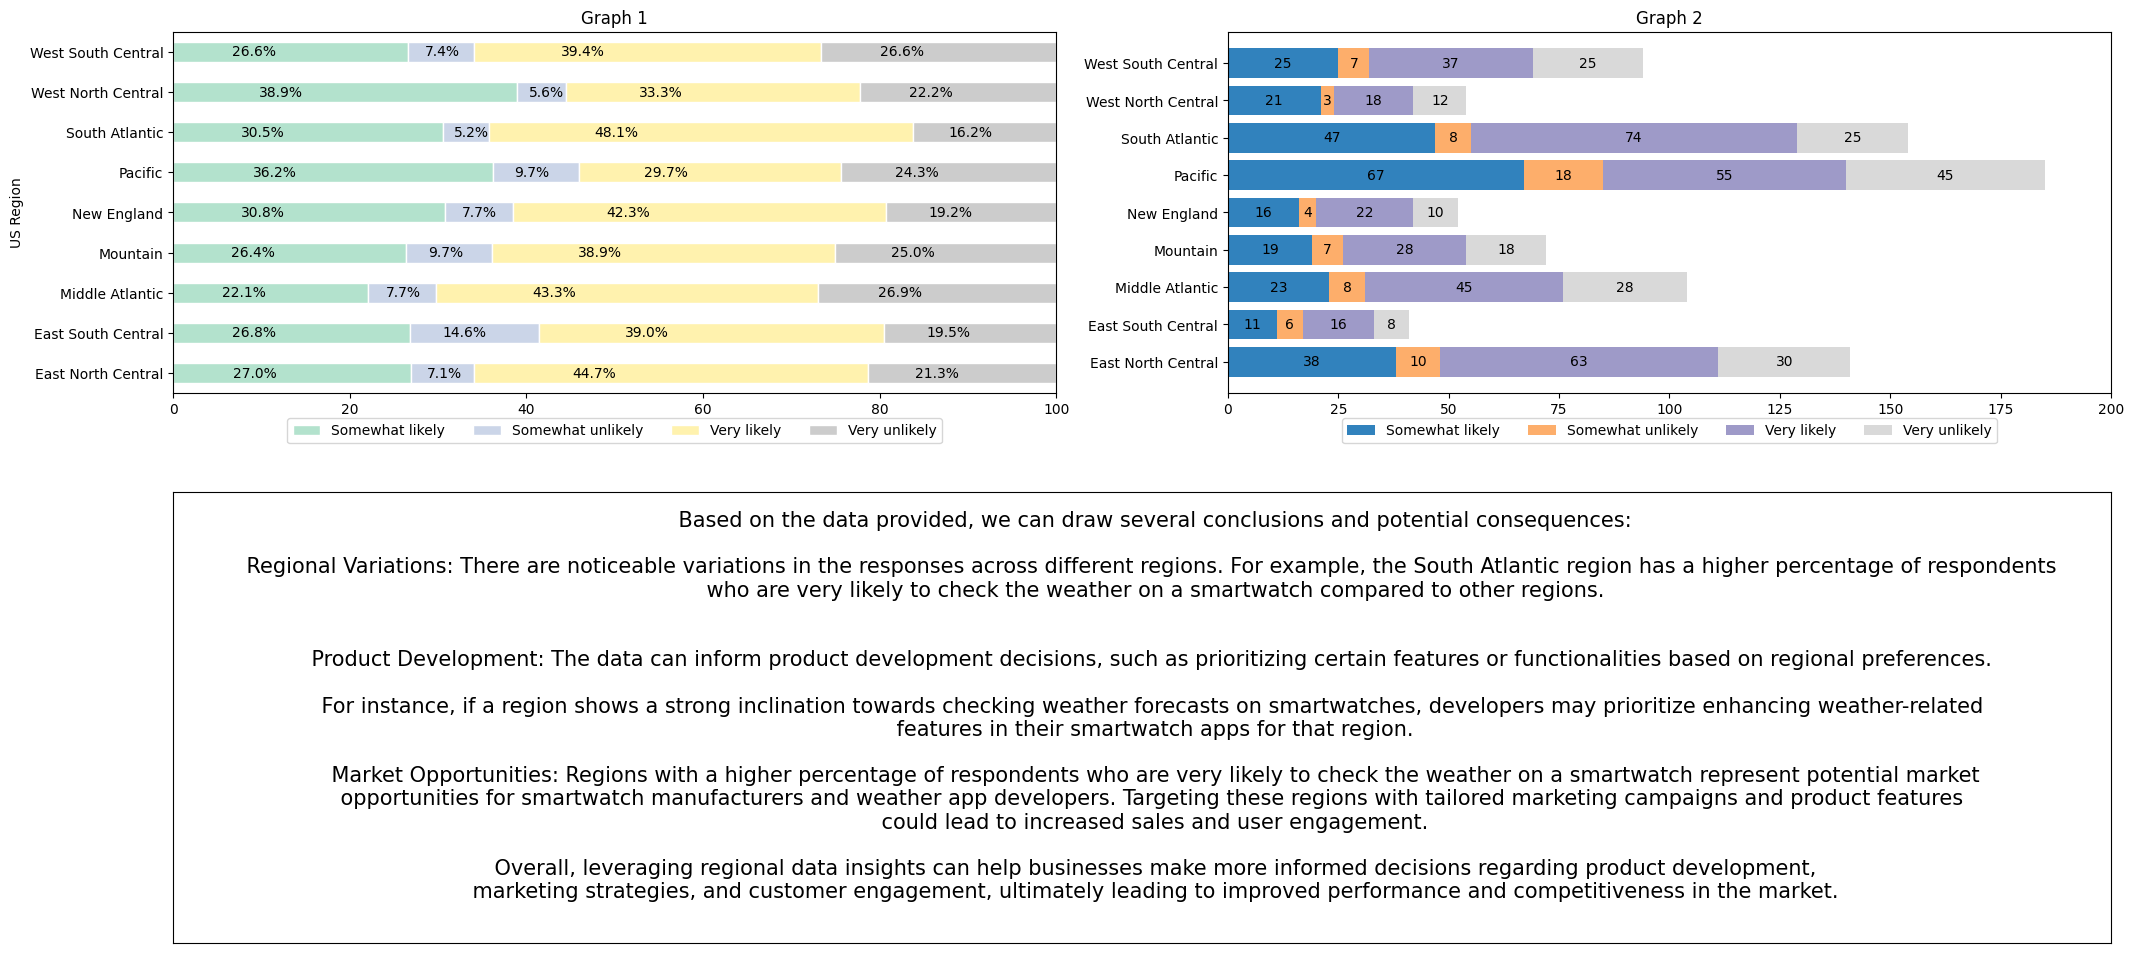

In [145]:
graph()